# initial coding

In [1]:
import pandas as pd

student_info = pd.read_csv('studentInfo.csv')
student_registration = pd.read_csv('studentRegistration.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_vle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')

# EDA

In [3]:
student_info.info()
student_registration.info()
student_assessment.info()
student_vle.info()
vle.info()
assessments.info()
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Nul

In [5]:
student_info.describe(include='all')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


In [7]:
student_registration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


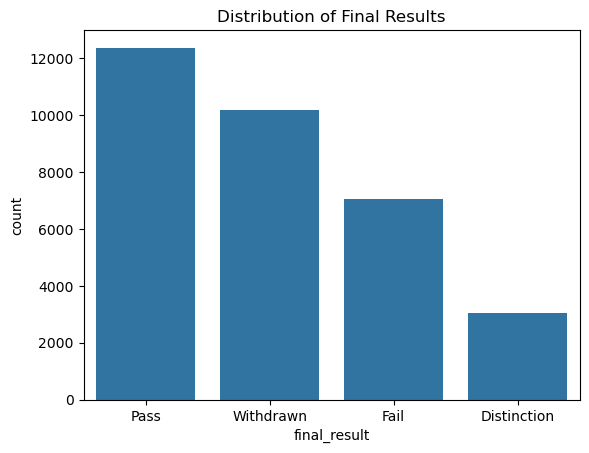

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='final_result', data=student_info)
plt.title('Distribution of Final Results')
plt.show()

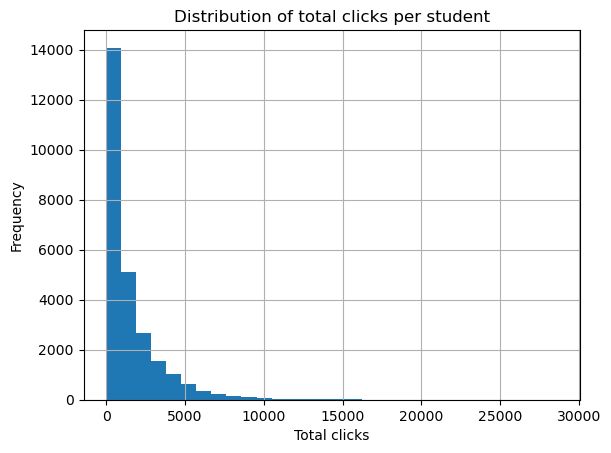

In [11]:
student_vle.groupby('id_student')['sum_click'].sum().hist(bins=30)
plt.title('Distribution of total clicks per student')
plt.xlabel('Total clicks')
plt.ylabel('Frequency')
plt.show()


# initial data pre-processing

In [17]:
df = student_info.copy()
df = df.merge(student_registration, on=['id_student', 'code_module', 'code_presentation'], how='left')
df = df.merge(courses, on=['code_module', 'code_presentation'], how='left')
assessment_full = student_assessment.merge(assessments, on='id_assessment', how='left')
score_stats = assessment_full.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    mean_score=('score', 'mean'),
    max_score=('score', 'max'),
    min_score=('score', 'min'),
    n_submissions=('score', 'count')
).reset_index()
missed = assessment_full[assessment_full['score'].isna()]
missed_count = missed.groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='n_missed')
score_features = pd.merge(score_stats, missed_count, on=['id_student', 'code_module', 'code_presentation'], how='left')
score_features['n_missed'] = score_features['n_missed'].fillna(0)
df = df.merge(score_features, on=['id_student', 'code_module', 'code_presentation'], how='left')
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,module_presentation_length,mean_score,max_score,min_score,n_submissions,n_missed
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,268,82.000000,85.0,78.0,5.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,268,66.400000,70.0,60.0,5.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,268,NaN,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,268,76.000000,88.0,71.0,5.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,268,54.400000,75.0,30.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,NaN,269,NaN,NaN,NaN,NaN,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,NaN,269,88.111111,100.0,72.0,9.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN,269,76.666667,100.0,60.0,9.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.0,269,91.500000,100.0,83.0,2.0,0.0


In [19]:
vle_full = student_vle.merge(vle, on=['id_site', 'code_module', 'code_presentation'], how='left')
vle_features = vle_full.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    total_clicks=('sum_click', 'sum'),
    active_days=('date', 'nunique'),
    activity_types=('activity_type', 'nunique')
).reset_index()
df = df.merge(vle_features, on=['id_student', 'code_module', 'code_presentation'], how='left')
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_unregistration,module_presentation_length,mean_score,max_score,min_score,n_submissions,n_missed,total_clicks,active_days,activity_types
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,NaN,268,82.000000,85.0,78.0,5.0,0.0,934.0,40.0,6.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,NaN,268,66.400000,70.0,60.0,5.0,0.0,1435.0,80.0,7.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,12.0,268,NaN,NaN,NaN,NaN,NaN,281.0,12.0,6.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,NaN,268,76.000000,88.0,71.0,5.0,0.0,2158.0,123.0,8.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,NaN,268,54.400000,75.0,30.0,5.0,0.0,1034.0,70.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,NaN,269,NaN,NaN,NaN,NaN,NaN,41.0,5.0,4.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,NaN,269,88.111111,100.0,72.0,9.0,0.0,893.0,45.0,7.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,NaN,269,76.666667,100.0,60.0,9.0,0.0,312.0,24.0,6.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,101.0,269,91.500000,100.0,83.0,2.0,0.0,275.0,13.0,6.0


In [21]:
df['registration_lead_ratio'] = (df['date_registration'] / df['module_presentation_length']).clip(upper=1)
vle_activity_stats = vle.groupby(['code_module', 'code_presentation'])['activity_type'].nunique().reset_index(name='n_activity_types')
df = df.merge(vle_activity_stats, on=['code_module', 'code_presentation'], how='left')
activity_clicks = vle_full.groupby(['id_student', 'code_module', 'code_presentation', 'activity_type'])['sum_click'].sum().unstack().fillna(0).reset_index()
activity_cols = activity_clicks.columns.difference(['id_student', 'code_module', 'code_presentation'])
for col in activity_cols:
    activity_clicks[f'{col}_click_ratio'] = activity_clicks[col] / activity_clicks[activity_cols].sum(axis=1).replace(0, 1)
df = df.merge(activity_clicks, on=['id_student', 'code_module', 'code_presentation'], how='left')
click_times = vle_full.groupby(['id_student', 'code_module', 'code_presentation'])['date'].agg(['min', 'max']).reset_index()
click_times['first_click_lag'] = click_times['min']
click_times['last_click_to_end'] = df['module_presentation_length'] - click_times['max']
click_times['engagement_span'] = click_times['max'] - click_times['min']
df = df.merge(click_times.drop(columns=['min', 'max']), on=['id_student', 'code_module', 'code_presentation'], how='left')
df['has_previous_attempts'] = df.duplicated(subset=['id_student', 'code_module'], keep='first').astype(int)
n_total_assessments = assessments.groupby(['code_module','code_presentation'])['id_assessment'].nunique().reset_index(name='n_total_assessments')
df = df.merge(n_total_assessments, on=['code_module','code_presentation'], how='left')
df['assessment_completion_ratio'] = df['n_submissions'] / df['n_total_assessments'].replace(0,1)


In [23]:
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,resource_click_ratio,sharedsubpage_click_ratio,subpage_click_ratio,url_click_ratio,first_click_lag,last_click_to_end,engagement_span,has_previous_attempts,n_total_assessments,assessment_completion_ratio
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.013919,0.0,0.034261,0.005353,-5.0,15.0,258.0,0,6,0.833333
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.008362,0.0,0.060627,0.033449,-10.0,29.0,249.0,0,6,0.833333
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.014235,0.0,0.078292,0.014235,-10.0,256.0,22.0,0,6,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.008804,0.0,0.066728,0.041705,-10.0,4.0,274.0,0,6,0.833333
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.043520,0.0,0.076402,0.013540,-10.0,21.0,257.0,0,6,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.097561,0.0,0.219512,0.000000,-4.0,250.0,23.0,0,10,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.122060,0.0,0.052632,0.000000,19.0,22.0,228.0,0,10,0.900000
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.060897,0.0,0.064103,0.000000,-10.0,42.0,237.0,0,10,0.900000
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.032727,0.0,0.043636,0.000000,-14.0,169.0,114.0,0,10,0.200000


In [25]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])

date_unregistration            22521
min_score                       6773
max_score                       6773
mean_score                      6773
assessment_completion_ratio     6750
n_missed                        6750
n_submissions                   6750
sharedsubpage_click_ratio       3365
resource_click_ratio            3365
repeatactivity                  3365
resource                        3365
sharedsubpage                   3365
subpage                         3365
url                             3365
dataplus_click_ratio            3365
dualpane_click_ratio            3365
externalquiz_click_ratio        3365
folder_click_ratio              3365
forumng_click_ratio             3365
glossary_click_ratio            3365
homepage_click_ratio            3365
htmlactivity_click_ratio        3365
oucollaborate_click_ratio       3365
oucontent_click_ratio           3365
ouelluminate_click_ratio        3365
engagement_span                 3365
questionnaire                   3365
l

In [27]:
df['unregistered'] = df['date_unregistration'].notnull().astype(int)
df.drop(columns='date_unregistration', inplace=True)
df[['mean_score', 'max_score', 'min_score', 'n_submissions']] = \
    df[['mean_score', 'max_score', 'min_score', 'n_submissions']].fillna(0)
df['n_missed'] = df['n_missed'].fillna(0)
df['assessment_completion_ratio'] = df['assessment_completion_ratio'].fillna(0)
df['n_submissions'] = df['n_submissions'].fillna(0)
behavior_cols = df.columns[df.columns.str.contains('click_ratio|active_days|total_clicks|_click$')]
df[behavior_cols] = df[behavior_cols].fillna(0)
df[['engagement_span', 'last_click_to_end', 'first_click_lag']] = \
    df[['engagement_span', 'last_click_to_end', 'first_click_lag']].fillna(-1)
df['imd_band'] = df['imd_band'].fillna('Unknown')
df = df.dropna(subset=['registration_lead_ratio', 'date_registration'])
activity_cols = [
    'ouwiki', 'oucontent', 'activity_types', 'dualpane', 'externalquiz', 'folder',
    'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'ouelluminate',
    'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage',
    'subpage', 'url', 'dataplus'
]

df[activity_cols] = df[activity_cols].fillna(0)
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


C:\Users\13621\AppData\Local\Temp\ipykernel_30464\3742475232.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[activity_cols] = df[activity_cols].fillna(0)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32548 entries, 0 to 32592
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code_module                  32548 non-null  object 
 1   code_presentation            32548 non-null  object 
 2   id_student                   32548 non-null  int64  
 3   gender                       32548 non-null  object 
 4   region                       32548 non-null  object 
 5   highest_education            32548 non-null  object 
 6   imd_band                     32548 non-null  object 
 7   age_band                     32548 non-null  object 
 8   num_of_prev_attempts         32548 non-null  int64  
 9   studied_credits              32548 non-null  int64  
 10  disability                   32548 non-null  object 
 11  final_result                 32548 non-null  object 
 12  date_registration            32548 non-null  float64
 13  module_presentation_l

In [31]:
object_columns = df.select_dtypes(include='object').columns
object_column_values = {col: df[col].unique().tolist() for col in object_columns}
object_column_values

{'code_module': ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'],
 'code_presentation': ['2013J', '2014J', '2013B', '2014B'],
 'gender': ['M', 'F'],
 'region': ['East Anglian Region',
  'Scotland',
  'North Western Region',
  'South East Region',
  'West Midlands Region',
  'Wales',
  'North Region',
  'South Region',
  'Ireland',
  'South West Region',
  'East Midlands Region',
  'Yorkshire Region',
  'London Region'],
 'highest_education': ['HE Qualification',
  'A Level or Equivalent',
  'Lower Than A Level',
  'Post Graduate Qualification',
  'No Formal quals'],
 'imd_band': ['90-100%',
  '20-30%',
  '30-40%',
  '50-60%',
  '80-90%',
  '70-80%',
  'Unknown',
  '60-70%',
  '40-50%',
  '10-20',
  '0-10%'],
 'age_band': ['55<=', '35-55', '0-35'],
 'disability': ['N', 'Y'],
 'final_result': ['Pass', 'Withdrawn', 'Fail', 'Distinction']}

In [33]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['disability'] = df['disability'].map({'N': 0, 'Y': 1})
df['age_band'] = df['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})
df['highest_education'] = df['highest_education'].map({
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
})
df['final_result_bin'] = df['final_result'].apply(lambda x: 1 if x == 'Withdrawn' else 0)
def parse_imd(x):
    if x == 'Unknown':
        return -1
    x = x.replace('%', '')
    parts = x.split('-')
    return (int(parts[0]) + int(parts[1])) / 2

df['imd_band_numeric'] = df['imd_band'].apply(parse_imd)
df['year'] = df['code_presentation'].str[:4].astype(int)
df['term'] = df['code_presentation'].str[4]  # 'J' or 'B'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32548 entries, 0 to 32592
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code_module                  32548 non-null  object 
 1   code_presentation            32548 non-null  object 
 2   id_student                   32548 non-null  int64  
 3   gender                       32548 non-null  int64  
 4   region                       32548 non-null  object 
 5   highest_education            32548 non-null  int64  
 6   imd_band                     32548 non-null  object 
 7   age_band                     32548 non-null  int64  
 8   num_of_prev_attempts         32548 non-null  int64  
 9   studied_credits              32548 non-null  int64  
 10  disability                   32548 non-null  int64  
 11  final_result                 32548 non-null  object 
 12  date_registration            32548 non-null  float64
 13  module_presentation_l

C:\Users\13621\AppData\Local\Temp\ipykernel_30464\2326112719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'M': 0, 'F': 1})
C:\Users\13621\AppData\Local\Temp\ipykernel_30464\2326112719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disability'] = df['disability'].map({'N': 0, 'Y': 1})
C:\Users\13621\AppData\Local\Temp\ipykernel_30464\2326112719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [35]:
df = df.select_dtypes(include=['int64', 'float64', 'int32'])
df

,id_student,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,module_presentation_length,mean_score,...,first_click_lag,last_click_to_end,engagement_span,has_previous_attempts,n_total_assessments,assessment_completion_ratio,unregistered,final_result_bin,imd_band_numeric,year
0,11391,0,3,2,0,240,0,-159.0,268,82.000000,...,-5.0,15.0,258.0,0,6,0.833333,0,0,95.0,2013
1,28400,1,3,1,0,60,0,-53.0,268,66.400000,...,-10.0,29.0,249.0,0,6,0.833333,0,0,25.0,2013
2,30268,1,2,1,0,60,1,-92.0,268,0.000000,...,-10.0,256.0,22.0,0,6,0.000000,1,1,35.0,2013
3,31604,1,2,1,0,60,0,-52.0,268,76.000000,...,-10.0,4.0,274.0,0,6,0.833333,0,0,55.0,2013
4,32885,1,1,0,0,60,0,-176.0,268,54.400000,...,-10.0,21.0,257.0,0,6,0.833333,0,0,55.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,2640965,1,1,0,0,30,0,-4.0,269,0.000000,...,-4.0,250.0,23.0,0,10,0.000000,0,0,15.0,2014
32589,2645731,1,1,1,0,30,0,-23.0,269,88.111111,...,19.0,22.0,228.0,0,10,0.900000,0,0,45.0,2014
32590,2648187,1,2,0,0,30,1,-129.0,269,76.666667,...,-10.0,42.0,237.0,0,10,0.900000,0,0,25.0,2014
32591,2679821,1,1,1,0,30,0,-49.0,269,91.500000,...,-14.0,169.0,114.0,0,10,0.200000,1,1,95.0,2014


In [39]:
df.to_csv('processed_data.csv', index=False)